---
syncID: 
title: "Introduction to NEON Discrete Lidar Point Clodus in Python"
description: "Programmatically download lidar data and metadata and explore discrete lidar point clouds in Python"
dateCreated: 2022-09-24
authors: Bridget Hass
contributors: 
estimatedTime: 30 minutes
packagesLibraries: requests, json, gdal, geopandas, laspy, lasrs
topics:
languagesTool: python
dataProduct: DP3.10003.001, 
code1: https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/tutorials/Python/Lidar/intro-lidar/intro_point_clouds_py/intro_discrete_point_clouds.py
tutorialSeries: 
urlTitle: neon-discrete-point-clouds
---

<div id="ds-objectives" markdown="1">

### Objectives
After completing this tutorial, you will be able to:

* Use Python functions to programmatically download NEON AOP data from the API
* Download and plot shapefiles and kmls included in lidar metadata to visualize coverage for a given year
* Explore the NEON discrete lidar point cloud contents in Python

### Requirements

To follow along with this code, you will need to install Python. We recommend starting in Jupyter Notebooks so you can run each cell "chunk" individually. You can install both Python and Jupyter Notebooks by downloading <a href="https://www.anaconda.com/products/distribution" target="_blank">Anaconda</a>.

You will also need to have the script `download_aop_files.py` downloaded and saved in your working directory.

### Additional Resources

If you are interested in learning more about the NEON API, or want a deeper dive in how this works with the Python `requests` package, please refer to the tutorial and webpages linked below.
 * <a href="https://www.neonscience.org/resources/learning-hub/tutorials/neon-api-01-introduction-requests" target="_blank"> Introduction to NEON API in Python  </a>
 * <a href="https://data.neonscience.org/data-api/" target="_blank"> NEON Data API </a>

For a handy resource on Jupyter Notebook tips, tricks and shortcuts, check out the DataQuest blog linked below.
 * <a href="https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-sh" target="_blank"> 28 Jupyter Notebook Tips, Tricks, and Shortcuts  </a>
 

### Install Python Packages

* **requests**
* **json** 
* **gdal**
* **fiona**
* **geopandas**
* **laspy**
* **lazrs**

#### Installation Tips: 
Most of these packages can be installed using `pip install`, eg. to install `gdal`, in the command line, run:

```python
pip install gdal
```

or within Jupyter notebooks you can also install packages but have to include an ! before the statement to run a shell command (as you would from a command prompt):

```python
!pip install gdal
```

However for many of the geospatial packages (eg. gdal, fiona, geopandas), there may be errors installing on your version of python if you don't find the correct wheel file. You can find the package wheel file specific to your version of python and your computer. A comprehensive archive of these geospatial (and other) wheel files can be found here:

https://www.lfd.uci.edu/~gohlke/pythonlibs/

For example, to install `gdal` on a windows 64 machine, using Python 3.9, download the file GDAL-3.4.3-cp39-cp39-win_amd64.whl, found here (you can also find this by navigating through the link above):

https://www.lfd.uci.edu/~gohlke/pythonlibs/#gdal

```python
pip install C:\Users\username\Downloads\GDAL-3.4.3-cp39-cp39-win_amd64.whl
```

Similarly, to install `fiona`, download the wheel file Fiona-1.8.21-cp39-cp39-win_amd64.whl

```python
pip install C:\Users\username\Downloads\Fiona-1.8.21-cp39-cp39-win_amd64.whl
```

</div>

First, we need to import the required Python packages. 

**Reminder**: If you haven't installed these packages (see more detailed installation instructions above), you can install them in the notebook as shown below. If the install doesn't work with a simple pip install, download the appropriate wheel file and substitute the package name with the wheel file name (including the full path). We recommend installing these packages one by one so you can make sure each package installs successfully.

```python
!pip install requests
!pip install json
!pip install gdal
!pip install fiona
!pip install geopandas
!pip install laspy
!pip install lazrs
```

Once all packages are successfully installed, import them as follows. Note that the `requests` and `json` packages will be imported when we import the separate module, so you don't need to import those separately.

In [1]:
#import required packages
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import laspy

Now we'll pull in all the functions in the module **neon_aop_download_functions.py**, linked at the top of this tutorial. 

First make sure this script is saved in your working directory, which we'll check below, otherwise you will need to provide the relative path to this script. 

In [2]:
# check that script is saved in same folder:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'intro_discrete_point_clouds.ipynb',
 'neon_aop_download_functions.py',
 '__pycache__']

We can see that the download_functions script is there, so to import the contents, use the command:

In [3]:
from neon_aop_download_functions import *

Alternatively, if you'd like to see the contents of that file, you can use the "magic" command `%load` as follows:

```python
%load neon_aop_download_functions.py
```

If you go this route, you will need to run the cell twice for the functions to be read into the ntoebook. The first run will load the functions and the second will run the cell. This option of loading in the functions may be useful if you wish to modify the functions in the notebook cell for your specific workflow.

Now that we've imported in all the required packages and functions, we can get started! First let's take a look at what exactly we've imported by using the magic command `%whos`. Since there's no variable explorer in Jupyter Notebooks, this is a quick way to see what all we have in our working environment.

In [4]:
%whos

Variable                      Type        Data/Info
---------------------------------------------------
download_aop_files            function    <function download_aop_fi<...>es at 0x00000218DB3FE3A0>
download_file                 function    <function download_file at 0x00000218DB3FE280>
download_urls                 function    <function download_urls at 0x00000218DB3FE1F0>
get_file_size                 function    <function get_file_size at 0x00000218DB3FE310>
gpd                           module      <module 'geopandas' from <...>\geopandas\\__init__.py'>
laspy                         module      <module 'laspy' from 'C:\<...>ges\\laspy\\__init__.py'>
list_available_urls           function    <function list_available_<...>ls at 0x00000218DB3FE040>
list_available_urls_by_year   function    <function list_available_<...>ar at 0x00000218DB3FE160>
np                            module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
os                            module     

### Data Tip
If you are unsure what a function or module does, you can find more information about the function in two ways: 
1. type `help(function_name)`, which will print out documentation below the cell, or
2. type the function name followed by `?`, which will pop up the documentation at the bottom of your Jupyter Notebook window, and you can then exit out of it at your convenience

```python
help(requests)
requests?
```

The functions loaded from the `neon_aop_download_functions.py` file also include similar documentation, so you can use this trick for these user-defined functions.

```python
help(list_available_urls)
list_available_urls?
```

This tutorial will be working with the Discrete Return LiDAR Point Cloud https://data.neonscience.org/data-products/DP1.30003.001)

First we'll start by defining variables that specify the NEON data product ID, site, and year. You can change these to look at a different site of your interest, but this tutorial will explore the NEON site `GUAN` in Domain 04, Puerto Rico.

In [5]:
dpID='DP1.30003.001' 
site = 'GUAN'

We can use the function `list_available_urls` to see what data is available for this data product and site. This function requires two inputs: the data product ID `dpID` and the site ID, `site`.

In [6]:
help(list_available_urls)

Help on function list_available_urls in module neon_aop_download_functions:

list_available_urls(product, site)
    list_available urls lists the api url for a given product and site
    --------
     Inputs:
         product: the data product code (eg. 'DP3.30015.001' - CHM)
         site: the 4-digit NEON site code (eg. 'SRER', 'JORN')
    --------
    Usage:
    --------
    jorn_chm_urls = list_available_urls('DP3.30015.001','JORN')



In [7]:
list_available_urls(dpID,site)

['https://data.neonscience.org/api/v0/data/DP1.30003.001/GUAN/2018-05']

The AOP has only flown Puerto Rico (D04) once so far, in 2018. D04 is only on the AOP schedule every 4 years; the next campaign is scheduled for the fall of 2022, so new data is expected relatively soon!

Next let's set up some paths where we can save our downloaded data. We'll start with downloading geospatial metadata in order to get a sense of the coverage (geographic extents) of the flight area. We'll make a folder for the shapefiles (shp), kml files (which may be useful for interactively looking at the site boundaries in Google Earth), and a folder for the actual lidar (laz) data.

In [8]:
year='2018'
data_root_path = './data/'+site+'/'+year+'/'
shp_path = data_root_path+'shp/'
kml_path = data_root_path+'kml/'
laz_path = data_root_path+'laz/'
print(data_root_path)

./data/GUAN/2018/


Next, let's take a look at the `download_aop_files` function, which we'll use to download the metadata and data that we want to explore.

In [9]:
help(download_aop_files)

Help on function download_aop_files in module neon_aop_download_functions:

download_aop_files(product, site, year=None, download_folder='./data', match_string=None, check_size=True)
    download_aop_files downloads NEON AOP files from the AOP for a given data product, site, and 
    optional year, download folder, and 
    --------
     Inputs:
         required:
             product: the data product code (eg. 'DP3.30015.001' - CHM)
             site: the 4-digit NEON site code (eg. 'SRER', 'JORN')
         
         optional:
             year: year (eg. '2020'); default (None) is all years
             download_folder: folder to store downloaded files; default (./data) in current directory
             match_string: subset of data to match, need to use exact pattern for file name
             check_size: prompt to continue download (y/n) after displaying size; default = True
    --------
    Usage:
    --------
    download_aop_files('DP3.30015.001','JORN','2019','./data/JORN_2019/

The only required inputs for this function are the `product` and the `site`; optionally we can specify the `year`, the `download_folder` to save the files, and a `match_string` to download a subset of the data by a string. By default, the function will display the size of the files, and prompt the user to continue the download (by typing `y`); any other response will halt the download. This is to prevent an accidental download of a large volume of data.

We'll start by downloading the shape files, which are included as part of the metadata with the lidar data products. Because AOP data for a full site can be pretty large, and you may only need to work with a subset of the data for a given site, we recommend starting with the metadata to get a better sense of the data and your area of interest.

There are summary shape files provided along with the lidar data for each site. These summary files end with `merged_tiles.shp/.shx`, so we can key off that string to download only the full boundary shape file. You could also download all of the individual `.shp` files for each data tile (L3 data is provided in 1km x 1km tiles), by using the match string `.shp`, or similarly all the `.kml` files, if you wanted to pull the data boundaries into Google Earth and explore more interactively.

Try out some of the options below to explore different metadata products. Optionally, you can set `check_size=False` since these will all have small data volumes.

```python
#download all shp files (L3 - tiles)
download_aop_files(dpID,site,year,kml_path,'.shp',check_size=False) 

#download all kml files (L1 - flightline + L3 - tiles)
download_aop_files(dpID,site,year,kml_path,'.kml',check_size=False) 

#downloads only the full boundary kml files
download_aop_files(dpID,site,year,kml_path,'full_boundary.kml',check_size=False) 
```

In [10]:
download_aop_files(dpID,site,year,shp_path,'merged_tiles.shp',check_size=False)
download_aop_files(dpID,site,year,shp_path,'merged_tiles.shx',check_size=False)

Download size: 0.78 kB
downloading 2018_GUAN_1_merged_tiles.shp to ./data/GUAN/2018/shp/
Download size: 0.0 kB
downloading 2018_GUAN_1_merged_tiles.shx to ./data/GUAN/2018/shp/


We can see that these files have downloaded to the expected location by listing the contents of the `shp_path` directory that we've made:

In [11]:
os.listdir(shp_path)

['2018_GUAN_1_merged_tiles.shp', '2018_GUAN_1_merged_tiles.shx']

download_aop_files(dpID,site,year,kml_path,'.kml')

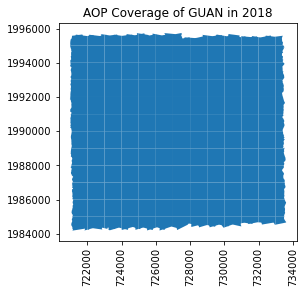

In [12]:
gdf = gpd.read_file(os.path.join(shp_path,'2018_GUAN_1_merged_tiles.shp'))
gdf.plot();
ax = plt.gca(); ax.ticklabel_format(style='plain') 
ax.set_title('AOP Coverage of ' + site + ' in ' + year);
plt.xticks(rotation=90); #optionally rotate the xtick labels

In [13]:
download_aop_files(dpID,site,year,kml_path,'full_boundary.kml',check_size=False) 

Download size: 0.13 kB
downloading full_boundary.kml to ./data/GUAN/2018/kml/


If you pull this into Google Earth you can see the coverage with more geographic context:

<figure>
    <a href="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/py-figs/intro-point-clouds-py/guan_boundary_google_earth.PNG">
    <img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/py-figs/intro-point-clouds-py/guan_boundary_google_earth.PNG" width="400"/>GUAN kml boundary</a>
    <figcaption="KML boundary of GUAN"</figcaption>
</figure>

Now that we can see the extent of the tiles, we'll pick a single tile in this area to download. For this example, I'll choose the tile "724000_1985000" towards the southern part of the site, including both land and sea.

In [14]:
download_aop_files('DP1.30003.001',site,year,laz_path,match_string='725000_1985000_classified_point_cloud_colorized.laz')

Download size: 18.0 MB
Do you want to continue with the download? (y/n) y
downloading NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz to ./data/GUAN/2018/laz/


We can use `os.listdir` again to check that this file successfully downloaded to the expected location. Alternatively you could go into your file explorer.

In [15]:
os.listdir(laz_path)

['NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz']

Now that we've successfully downloaded a laz (or zipped las) file, we can use the `laspy` package to read it in! We'll do that in the next line, reading the lidar file into the variable name `point_cloud`:

In [16]:
laz_data_file=os.path.join(laz_path,'NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz')
point_cloud=laspy.read(laz_data_file)

Reading in the file with with laspy.read() reads in both the metadata and the raw point cloud data. We can print out the `point_cloud` variable to show some basic information about what we've read in:

In [17]:
point_cloud

<LasData(1.3, point fmt: <PointFormat(3, 4 bytes of extra dims)>, 2968778 points, 2 vlrs)>

`point_format.dimension_names` show us the available information stored in this LasData object format:

In [18]:
list(point_cloud.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'reversible index (lastile)']

In the next few cells, we can explore some of these variables:

In [19]:
point_cloud.classification

<SubFieldView([2 2 2 ... 7 7 7])>

Let's get the `set` of this `list` to see all the unique classification values in this file. This may take a little time to run.

In [20]:
set(list(point_cloud.classification))

{1, 2, 5, 6, 7}

Las files have "predefined classification schemes defined by the American Society for Photogrammetry and Remote Sensing (ASPRS)". Refer to https://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/lidar-point-classification.htm for more details.

The following table lists the LAS classification codes defined by ASPRS for these LAS versions:

| Classification value | Meaning           |
|---------------------|-------------------|
| 0                   | Never classified  |
| 1                   | Unassigned        |
| 2                   | Ground            |
| 3                   | Low Vegetation    |
| 4                   | Medium Vegetation |
| 5                   | High Vegetation   |
| 6                   | Building          |
| 7                   | Low Point         |

Next let's take a look at what we can consider to be the main data - the geographic loation of each point in the point cloud. This can be accessed either by `point_cloud.X`, `point_cloud.Y`, `point_cloud.Z`, or more succinctly by `point_cloud.xyz`. Let's take a look at this:

In [21]:
point_cloud.xyz

array([[ 7.25894810e+05,  1.98500265e+06,  2.50000000e-01],
       [ 7.25915210e+05,  1.98500018e+06,  4.20000000e-01],
       [ 7.25893550e+05,  1.98500798e+06,  2.20000000e-01],
       ...,
       [ 7.25085510e+05,  1.98583553e+06, -1.80370000e+02],
       [ 7.25101320e+05,  1.98584004e+06, -2.37230000e+02],
       [ 7.25122790e+05,  1.98583813e+06, -3.05320000e+02]])

We can see this is a 3-dimensional array, as we might expect. Let's read this into the variable `xyz`:

In [22]:
xyz = point_cloud.xyz

We can see the size (or number of points) in this array using the built-in python function `len`:

In [23]:
len(xyz)

2968778

There are > 2 million lidar points in this single 1km x 1km tile. For the rest of this exercise, we'll look at a random subset of these points, taking every100th point (you can change this subset factor, but when we visualize the data in a few steps, subsetting by a larger factor will speed up the time it takes to make the plot).

In [24]:
factor=100
points_dec = xyz[::factor]

These point clouds have been "colorized" by the camera RGB imagery. If you refer back to the dimension names, you can see there are a `red`, `green`, and `blue` attributes. We can pull these into a single array by using `np.vstack`:

In [25]:
# points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()

These colors have been scaled to store the color at a higher resolution, accomodated by the camera, so we'll need to re-scale the values between 0-1 in order to use them in our plot. The code below does this re-scaling, and then subsets the color data to by same factor we used to subset the `xyz` data.

In [26]:
colors_norm = (colors - np.min(colors))/np.ptp(colors)
colors_dec = colors_norm[::factor]

### 3D Point Cloud Visualization 
Lastly, we can visualize this 3D data using matplotlib to see what the point cloud looks like. Other open-source tools such as https://plas.io/ are more interactive, and Python may not be the best platform to do this sort of visualization, but we can at least demonstrate how this might look.

For this you'll need to import some visualization packages. These should be part of the standard Anaconda distribution.

https://www.neonscience.org/resources/learning-hub/tutorials/introduction-light-detection-and-ranging-lidar-explore-point#toggle-13

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

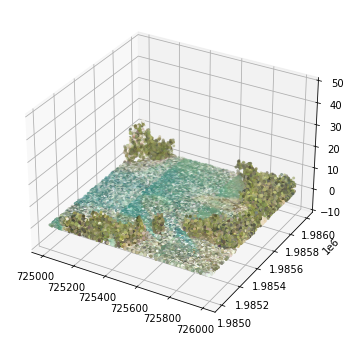

In [28]:
# Plot the las data in 3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_dec[:,0],points_dec[:,1],points_dec[:,2],color=colors_dec,s=4)
ax.set_zlim3d(-10,50)
plt.show()

We can see a mix of both land and sea here, with slightly fewer returns on the ocean. A lot of the energy from the laser beam is absorbed in water, so it is typical to see poor density over these areas. Remember this plot only displays 1/100th of the data, so there is a lot more information stored in the las file than is shown here.

## What's next?

If you'd like to continue exploring the point cloud data in Python using `laspy`, <a href="https://laspy.readthedocs.io/en/latest/complete_tutorial.html" target="_blank"> laspy website </a> has some nice examples you can follow, now that you know how to download NEON point cloud data and read it into Python.

### Python and Beyond ...

There are also a number of open-source tools for working with point-cloud data. Python may not be the best option for developing more rigourous processing workflows, for example. The resources below show some other recommended tools that can be integrated with Python for your analysis:

* <a href="https://rapidlasso.com/lastools/" target="_blank">LAStools</a>
* <a href="https://pdal.io/en/stable/" target="_blank">PDAL (Point Data Abstraction Library)</a> 
* <a href="https://r-lidar.github.io/lidRbook/" target="_blank"> lidR (R package for point cloud data)</a>